# Meeting JC 140820 #
## Example of SIR with included uncertainties ##

In [15]:
using DifferentialEquations
using Plots
using Interact
using ModelingToolkit
using Measurements
# using WebIO
# WebIO.install_jupyter_nbextension()

In [17]:
function sir_ode!(du, u, p, t) # ! since modifies du -- in-place updating

    # unpack variables and parameters
    S, I, R = u     # u = (S(t), I(t), R(t))
    β, γ = p

    # define differential equations
    dS = -β*S*I
    dI = +β*S*I - γ*I
    dR = +γ*I

    du .= (dS, dI, dR) # copy the values into the vector du; note the '.'

end

sir_ode! (generic function with 1 method)

In [18]:
β = 0.1
γ = 0.05

parameters = [β, γ]

S₀ = 0.99  # write subscript 0 as S\_0<TAB>
I₀ = 0.01
R₀ = 0.0

initial_values = [S₀, I₀, R₀]
t_span = [0.0, 200.0] # initial and final time

2-element Array{Float64,1}:
   0.0
 200.0

In [19]:
# set up problems
problem = ODEProblem(sir_ode!, initial_values, t_span, parameters)

# solve problem (integration)
solution = solve(problem, saveat = 0.1); #saveat is save info at 0.1, otherwise automatic

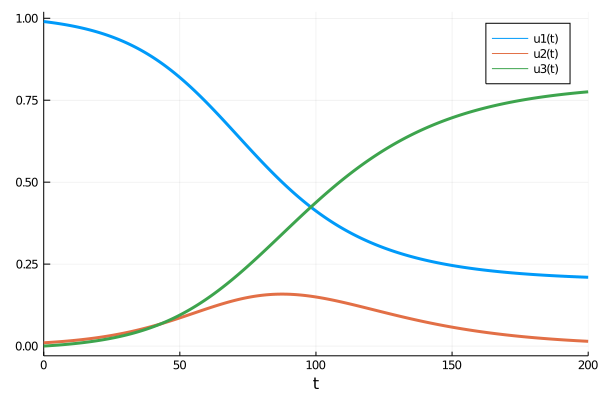

In [20]:
# plot
plot(solution, solution = ["S", "I", "R"], lw = 3) # row vector of labels

## Uncertainties on parameters ##

In [21]:
β = 0.1 ± 0.01  # add uncertainties
γ = 0.05 ± 0.01

parameters = [β, γ]

S₀ = 0.99  # write subscript 0 as S\_0<TAB>
I₀ = 0.01
R₀ = 0.0

initial_values = [S₀, I₀, R₀]
t_span = [0.0, 200.0] # initial and final time

2-element Array{Float64,1}:
   0.0
 200.0

In [22]:
# set up problems
problem = ODEProblem(sir_ode!, initial_values, t_span, parameters)

# solve problem (integration)
solution = solve(problem, saveat = 1.0); #saveat is save info at 0.1, otherwise automatic

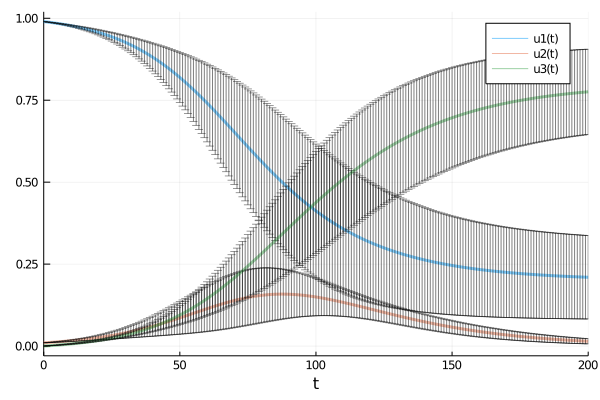

In [23]:
# plot
plot(solution, alpha = 0.5, solution = ["S", "I", "R"], lw = 3) # row vector of labels